In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [55]:
data=pd.read_csv("timeseries.csv")
data2= pd.read_csv("WIFI.csv")

In [5]:
data

,DATE,X,Y,Z,P
0,09/09/9999,412,10604,1408,40.674860
1,09/09/9999,407,10555,1359,40.747560
2,09/09/9999,301,12370,1699,40.711926
3,09/09/9999,302,9893,298,40.689985
4,09/09/9999,108,10169,599,40.764630
...,...,...,...,...,...
3314,09/09/9999,306,10872,1338,40.680630
3315,04/20/2018,201,12026,4113,40.810896
3316,08/02/2017,301,12063,3018,40.701930
3317,05/11/2018,317,12066,3021,40.638560


In [56]:
data2

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,10604,4,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.674860,-73.784120,1.044132e+06,185219.8921,...,Springfield Gardens North,28,11434,412,294,294,0,0,1408,"(40.6748599999, -73.7841200005)"
1,10555,4,Limited Free,SPECTRUM,Kissena Park,Park Perimeter,40.747560,-73.818150,1.034638e+06,211685.2178,...,Flushing,20,11355,407,845,845,0,0,1359,"(40.7475599996, -73.8181499997)"
2,12370,3,Free,Transit Wireless,Grand St (L),Grand St (L),40.711926,-73.940670,1.000698e+06,198655.9088,...,East Williamsburg,34,11206,301,495,495,0,0,1699,"(40.7119259997, -73.9406699994)"
3,9893,3,Free,Downtown Brooklyn,NaN,125 Court St.,40.689985,-73.991995,9.864700e+05,190656.6804,...,Brooklyn Heights-Cobble Hill,33,11201,302,9,9,3388736,3002777501,298,"(40.6899850001, -73.9919950004)"
4,10169,1,Free,Transit Wireless,Lexington Av-63 St (F),Lexington Av-63 St (F),40.764630,-73.966115,9.936366e+05,217853.8882,...,Upper East Side-Carnegie Hill,4,10065,108,120,120,0,0,599,"(40.7646300002, -73.9661150001)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,10872,3,Limited Free,SPECTRUM,Carroll Park,Court off Smith St between Carrol St and 1st P...,40.680630,-73.995382,9.855309e+05,187248.3142,...,Carroll Gardens-Columbia Street-Red Hook,39,11231,306,77,77,3007547,3004490015,1338,"(40.6806299998, -73.9953819995)"
3315,12026,2,Free,LinkNYC - Citybridge,bx-01-138789,312 WILLIS AVENUE,40.810896,-73.921434,1.005999e+06,234718.2941,...,Mott Haven-Port Morris,8,10454,201,39,39,2000335,2022850010,4113,"(40.8108964904, -73.9214341701)"
3316,12063,3,Free,LinkNYC - Citybridge,bk-01-143982,32 GRAHAM AVENUE,40.701930,-73.942239,1.000265e+06,195013.9010,...,East Williamsburg,34,11206,301,491,491,3071609,3031200000,3018,"(40.7019303441, -73.9422392381)"
3317,12066,3,Free,LinkNYC - Citybridge,bk-17-126527,1339 FLATBUSH AVENUE,40.638560,-73.953603,9.971268e+05,171924.2714,...,Erasmus,45,11226,317,790,790,3120360,3052110060,3021,"(40.6385596088, -73.9536032378)"


In [6]:
data.head()

,DATE,X,Y,Z,P
0,09/09/9999,412,10604,1408,40.674860
1,09/09/9999,407,10555,1359,40.747560
2,09/09/9999,301,12370,1699,40.711926
3,09/09/9999,302,9893,298,40.689985
4,09/09/9999,108,10169,599,40.764630


In [7]:
data.shape

(3319, 5)

In [8]:
data.index

RangeIndex(start=0, stop=3319, step=1)

In [9]:
data.columns

Index(['DATE', 'X', 'Y', 'Z', 'P'], dtype='object')

In [10]:
data.dtypes

DATE     object
X         int64
Y         int64
Z         int64
P       float64
dtype: object

In [13]:
data["X"].unique()

array([412, 407, 301, 302, 108, 110, 405, 316, 203, 101, 502, 401, 304,
       103, 106, 105, 404, 306, 317, 102, 305, 207, 107, 402, 111, 104,
       210, 109, 308, 201, 406, 409, 212, 313, 410, 112, 205, 355, 311,
       307, 595, 408, 211, 204, 501, 413, 206, 303, 403, 309, 315, 314,
       318, 503, 414, 310, 411, 208, 164, 228, 202, 209, 312, 482, 226,
       481, 227], dtype=int64)

In [20]:
data["X"].nunique()

67

In [14]:
data.nunique()

DATE     416
X         67
Y       3319
Z       3319
P       3136
dtype: int64

In [15]:
data.count()

DATE    3319
X       3319
Y       3319
Z       3319
P       3319
dtype: int64

In [18]:
data["X"].value_counts()

105    234
106    212
107    211
302    206
110    169
      ... 
209      4
482      3
226      2
481      1
227      1
Name: X, Length: 67, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3319 entries, 0 to 3318
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    3319 non-null   object 
 1   X       3319 non-null   int64  
 2   Y       3319 non-null   int64  
 3   Z       3319 non-null   int64  
 4   P       3319 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 129.8+ KB


In [26]:
data.DATE=="clear" #filtering

0       False
1       False
2       False
3       False
4       False
        ...  
3314    False
3315    False
3316    False
3317    False
3318    False
Name: DATE, Length: 3319, dtype: bool

In [30]:
data["X"]==105

0       False
1       False
2       False
3       False
4       False
        ...  
3314    False
3315    False
3316    False
3317    False
3318    False
Name: X, Length: 3319, dtype: bool

In [31]:
data[data["X"]==105] #filtering

,DATE,X,Y,Z,P
23,06/12/2017,105,10885,3843,40.760235
46,10/20/2017,105,12154,4169,40.747627
55,10/20/2017,105,11474,4369,40.760474
59,05/09/2017,105,11225,4350,40.757734
61,04/14/2017,105,11437,3933,40.742760
...,...,...,...,...,...
3270,04/06/2016,105,12665,3242,40.759221
3276,06/14/2017,105,12715,3292,40.749832
3281,04/25/2018,105,11763,3999,40.740513
3302,11/02/2017,105,10725,3831,40.745578


In [32]:
data.isnull()

,DATE,X,Y,Z,P
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3314,False,False,False,False,False
3315,False,False,False,False,False
3316,False,False,False,False,False
3317,False,False,False,False,False


In [33]:
data.isnull().sum()

DATE    0
X       0
Y       0
Z       0
P       0
dtype: int64

In [34]:
data.notnull()

,DATE,X,Y,Z,P
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
3314,True,True,True,True,True
3315,True,True,True,True,True
3316,True,True,True,True,True
3317,True,True,True,True,True


In [35]:
data.notnull().sum()

DATE    3319
X       3319
Y       3319
Z       3319
P       3319
dtype: int64

In [45]:
data.rename(columns={"X":"Sales","Y":"Total Sales"})

,DATE,Sales,Total Sales,Z,P
0,09/09/9999,412,10604,1408,40.674860
1,09/09/9999,407,10555,1359,40.747560
2,09/09/9999,301,12370,1699,40.711926
3,09/09/9999,302,9893,298,40.689985
4,09/09/9999,108,10169,599,40.764630
...,...,...,...,...,...
3314,09/09/9999,306,10872,1338,40.680630
3315,04/20/2018,201,12026,4113,40.810896
3316,08/02/2017,301,12063,3018,40.701930
3317,05/11/2018,317,12066,3021,40.638560


In [ ]:
data.rename(columns={"X":"Sales","Y":"Total Sales"},inplace=True) #making the column names permanently

In [44]:
data.head()

,DATE,Sales,Total Sales,Z,P
0,09/09/9999,412,10604,1408,40.674860
1,09/09/9999,407,10555,1359,40.747560
2,09/09/9999,301,12370,1699,40.711926
3,09/09/9999,302,9893,298,40.689985
4,09/09/9999,108,10169,599,40.764630


In [48]:
data.Sales.mean() #mean of Sales

218.88098824947272

In [51]:
data.Sales.std() #standard deviation of Sales

128.09878363828338

In [52]:
data.Sales.var() #variance of Sales

16409.298369607735

In [53]:
data["Sales"].var() # Alternatively

16409.298369607735

In [60]:
data2[data2["Provider"].str.contains("SPECTRUM")].head(10) #showing specified area of interest

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,10604,4,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.674860,-73.784120,1.044132e+06,185219.8921,...,Springfield Gardens North,28,11434,412,294,294,0,0,1408,"(40.6748599999, -73.7841200005)"
1,10555,4,Limited Free,SPECTRUM,Kissena Park,Park Perimeter,40.747560,-73.818150,1.034638e+06,211685.2178,...,Flushing,20,11355,407,845,845,0,0,1359,"(40.7475599996, -73.8181499997)"
5,10880,4,Limited Free,SPECTRUM,Kissena Park,Park Perimeter,40.742430,-73.811510,1.036481e+06,209820.0886,...,Queensboro Hill,20,11355,407,1215,1215,0,0,1347,"(40.7424300003, -73.8115100003)"
64,11555,1,Limited Free,SPECTRUM,Pelham Fritz Recreation Center,Amplitheater,40.805013,-73.944909,9.995016e+05,232569.7728,...,East Harlem North,9,10027,111,198,198,1083967,1017190001,1079,"(40.8050129997, -73.9449089999)"
71,11631,1,Limited Free,SPECTRUM,West Harlem Piers,Pier and South Seating Area,40.820590,-73.959690,9.954070e+05,238242.8015,...,Manhattanville,7,10027,109,22302,22302,0,1020050024,1187,"(40.8205899999, -73.9596899999)"
87,9809,1,Limited Free,SPECTRUM,Jackie Robinson Recreation Center,Library,40.824131,-73.942464,1.000174e+06,239535.5787,...,Hamilton Heights,9,10039,110,231,231,1084164,1020520001,949,"(40.8241309998, -73.9424640006)"
89,11645,4,Limited Free,SPECTRUM,"Phil ""Scooter"" Rizzuto Park",North West side of Park,40.695077,-73.822817,1.033383e+06,192561.4348,...,Richmond Hill,28,11419,409,148,148,0,0,1201,"(40.6950769996, -73.8228169995)"
103,9842,1,Limited Free,SPECTRUM,Jackie Robinson Recreation Center,Admin Office,40.824131,-73.942464,1.000174e+06,239535.5787,...,Hamilton Heights,9,10039,110,231,231,1084164,1020520001,982,"(40.8241309998, -73.9424640006)"
118,11542,4,Limited Free,SPECTRUM,Lost Battalion Hall Recreation Center,Sr. Dinning Area,40.731675,-73.865607,1.021497e+06,205874.0798,...,Rego Park,29,11374,406,71702,71702,4050408,4020770050,1066,"(40.7316749998, -73.8656070003)"
119,11582,4,Limited Free,SPECTRUM,Roy Wilkins Recreation Center,Rec Office #2,40.687191,-73.769559,1.048159e+06,189722.7056,...,St. Albans,27,11434,412,426,426,4268835,4124060180,1136,"(40.687191, -73.7695589996)"


In [61]:
data2.head(2)

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,10604,4,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.67486,-73.78412,1044131.897,185219.8921,...,Springfield Gardens North,28,11434,412,294,294,0,0,1408,"(40.6748599999, -73.7841200005)"
1,10555,4,Limited Free,SPECTRUM,Kissena Park,Park Perimeter,40.74756,-73.81815,1034637.511,211685.2178,...,Flushing,20,11355,407,845,845,0,0,1359,"(40.7475599996, -73.8181499997)"


In [64]:
data2[(data2["X"]>102343)&(data2["Y"]<182637)] #giving conditions

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
15,12500,5,Free,LinkNYC - Citybridge,si-02-125476,19 SEAVIEW AVENUE,40.590983,-74.100732,9.562733e+05,154603.5435,...,Old Town-Dongan Hills-South Beach,50,10304,502,96,96,5048677,5033050090,3585,"(40.5909830002, -74.1007320003)"
32,12286,3,Free,LinkNYC - Citybridge,bk-17-126297,3301 CHURCH AVE,40.651027,-73.946513,9.990918e+05,176467.5162,...,Erasmus,40,11203,317,818,818,3108643,3048700040,3469,"(40.6510267597, -73.9465128704)"
95,11705,3,Limited Free,ALTICEUSA,Coney Island Beach & Boardwalk,ROOF OF ABE STARK ICE RINK-RIGHT SIDE FRONT,40.572675,-73.985618,9.882455e+05,147917.7236,...,Seagate-Coney Island,47,11224,313,352,352,3189656,3070730101,1262,"(40.5726749996, -73.9856179998)"
97,11690,3,Limited Free,ALTICEUSA,Coney Island Beach & Boardwalk,ROOF OF AQUARIUM,40.573551,-73.977366,9.905379e+05,148237.3565,...,Seagate-Coney Island,47,11224,313,352,352,3245159,3086970008,1247,"(40.5735509999, -73.9773659998)"
125,9695,3,Limited Free,ALTICEUSA,Prospect Park,"NORTH BOAT HOUSE, ON THE LAWN ACROSS FROM M-200",40.661197,-73.965252,9.938906e+05,180170.1984,...,park-cemetery-etc-Brooklyn,39,11215,355,177,177,0,3011170001,892,"(40.6611970004, -73.9652520003)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,11562,4,Limited Free,SPECTRUM,Rockaway Beach and Boardwalk,Beach 116 - Comfort Station and Beach,40.577898,-73.835601,1.029918e+06,149863.1180,...,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,32,11694,414,938,938,0,0,1116,"(40.5778979997, -73.8356010003)"
3262,11591,5,Limited Free,SPECTRUM,Snug Harbor Cultural Center,North area off Richmond Terr,40.645123,-74.101629,9.560470e+05,174328.4434,...,West New Brighton-New Brighton-St. George,49,10310,501,97,97,0,5000750001,1145,"(40.6451229997, -74.1016290006)"
3272,11685,3,Limited Free,ALTICEUSA,Coney Island Beach & Boardwalk,W 10TH ST -2/P/S/O SURF AV,40.574582,-73.977901,9.903892e+05,148612.9374,...,Seagate-Coney Island,47,11224,313,352,352,0,0,1242,"(40.5745820002, -73.9779010002)"
3306,10757,3,Limited Free,ALTICEUSA,Gravesend Park,EASEMENT 56TH ST 5 P/S/18TH AV,40.623831,-73.983592,9.888048e+05,166555.2611,...,Borough Park,44,11204,312,468,468,0,3054940008,1307,"(40.6238310001, -73.9835919996)"


In [70]:
data2[(data2["X"]>102343) | (data2["Y"]<182637)] #condintion of OR

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,10604,4,Limited Free,SPECTRUM,Baisley Pond Park,Park Perimeter,40.674860,-73.784120,1.044132e+06,185219.8921,...,Springfield Gardens North,28,11434,412,294,294,0,0,1408,"(40.6748599999, -73.7841200005)"
1,10555,4,Limited Free,SPECTRUM,Kissena Park,Park Perimeter,40.747560,-73.818150,1.034638e+06,211685.2178,...,Flushing,20,11355,407,845,845,0,0,1359,"(40.7475599996, -73.8181499997)"
2,12370,3,Free,Transit Wireless,Grand St (L),Grand St (L),40.711926,-73.940670,1.000698e+06,198655.9088,...,East Williamsburg,34,11206,301,495,495,0,0,1699,"(40.7119259997, -73.9406699994)"
3,9893,3,Free,Downtown Brooklyn,NaN,125 Court St.,40.689985,-73.991995,9.864700e+05,190656.6804,...,Brooklyn Heights-Cobble Hill,33,11201,302,9,9,3388736,3002777501,298,"(40.6899850001, -73.9919950004)"
4,10169,1,Free,Transit Wireless,Lexington Av-63 St (F),Lexington Av-63 St (F),40.764630,-73.966115,9.936366e+05,217853.8882,...,Upper East Side-Carnegie Hill,4,10065,108,120,120,0,0,599,"(40.7646300002, -73.9661150001)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,10872,3,Limited Free,SPECTRUM,Carroll Park,Court off Smith St between Carrol St and 1st P...,40.680630,-73.995382,9.855309e+05,187248.3142,...,Carroll Gardens-Columbia Street-Red Hook,39,11231,306,77,77,3007547,3004490015,1338,"(40.6806299998, -73.9953819995)"
3315,12026,2,Free,LinkNYC - Citybridge,bx-01-138789,312 WILLIS AVENUE,40.810896,-73.921434,1.005999e+06,234718.2941,...,Mott Haven-Port Morris,8,10454,201,39,39,2000335,2022850010,4113,"(40.8108964904, -73.9214341701)"
3316,12063,3,Free,LinkNYC - Citybridge,bk-01-143982,32 GRAHAM AVENUE,40.701930,-73.942239,1.000265e+06,195013.9010,...,East Williamsburg,34,11206,301,491,491,3071609,3031200000,3018,"(40.7019303441, -73.9422392381)"
3317,12066,3,Free,LinkNYC - Citybridge,bk-17-126527,1339 FLATBUSH AVENUE,40.638560,-73.953603,9.971268e+05,171924.2714,...,Erasmus,45,11226,317,790,790,3120360,3052110060,3021,"(40.6385596088, -73.9536032378)"


In [66]:
data2.groupby("Location").mean() #means of each column against each location

,OBJECTID,Borough,Latitude,Longitude,X,Y,BoroCode,Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID
Location,,,,,,,,,,,,,,,
(PICNIC AREA) INSIDE PARK EAST SIDE OF INDIAN LAKE,11715.0,2.0,40.837539,-73.893658,1.013676e+06,244433.23820,2.0,17.0,10457.0,203.0,163.0,163.0,0.0,2.029420e+09,1274.0
(PICNIC AREA) INSIDE PARK WEST OF PLAYGROUND,11713.0,2.0,40.837117,-73.893310,1.013772e+06,244279.60530,2.0,17.0,10457.0,203.0,163.0,163.0,0.0,2.029420e+09,1271.0
1 Av (L),10841.0,1.0,40.730953,-73.981628,9.893418e+05,205582.99440,1.0,2.0,10009.0,103.0,34.0,34.0,0.0,0.000000e+00,1665.0
1 Boerum Place,10414.0,3.0,40.691702,-73.988758,9.873677e+05,191282.33250,3.0,33.0,11201.0,302.0,37.0,37.0,3000417.0,3.001530e+09,270.0
1 Dekalb Ave.,10416.5,3.0,40.690105,-73.982775,9.890268e+05,190700.64095,3.0,33.0,11201.0,302.0,15.0,15.0,3396776.0,3.001498e+09,272.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pole 78 - 133NS3E7av,10937.0,1.0,40.809559,-73.943417,9.999136e+05,234226.30460,1.0,9.0,10027.0,110.0,208.0,208.0,1053680.0,1.017260e+09,771.0
pole 79 - 5avWS3N132,10938.0,1.0,40.811575,-73.938453,1.001287e+06,234961.73160,1.0,9.0,10037.0,111.0,210.0,210.0,0.0,0.000000e+00,772.0
pole 84 - 137ss1eLen,10943.0,1.0,40.814952,-73.938941,1.001151e+06,236191.99850,1.0,9.0,10037.0,110.0,212.0,212.0,0.0,0.000000e+00,777.0


In [68]:
data2.groupby("Location").max()

C:\Users\HP840~1\AppData\Local\Temp/ipykernel_2500/3887977209.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  data2.groupby("Location").max()


,OBJECTID,Borough,Type,Provider,Name,Latitude,Longitude,X,Y,Location_T,...,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
Location,,,,,,,,,,,,,,,,,,,,,
(PICNIC AREA) INSIDE PARK EAST SIDE OF INDIAN LAKE,11715,2,Limited Free,ALTICEUSA,Crotona Park,40.837539,-73.893658,1.013676e+06,244433.2382,Outdoor,...,park-cemetery-etc-Bronx,17,10457,203,163,163,0,2029420001,1274,"(40.8375389998, -73.8936579994)"
(PICNIC AREA) INSIDE PARK WEST OF PLAYGROUND,11713,2,Limited Free,ALTICEUSA,Crotona Park,40.837117,-73.893310,1.013772e+06,244279.6053,Outdoor,...,park-cemetery-etc-Bronx,17,10457,203,163,163,0,2029420001,1271,"(40.8371170003, -73.8933099997)"
1 Av (L),10841,1,Free,Transit Wireless,1 Av (L),40.730953,-73.981628,9.893418e+05,205582.9944,Subway Station,...,East Village,2,10009,103,34,34,0,0,1665,"(40.7309530004, -73.9816279997)"
1 Boerum Place,10415,3,Free,Downtown Brooklyn,NaN,40.691860,-73.988711,9.873806e+05,191339.8979,Outdoor,...,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,33,11201,302,37,37,3000417,3001530003,271,"(40.6918600003, -73.988721)"
1 Dekalb Ave.,10417,3,Free,Downtown Brooklyn,NaN,40.690137,-73.982325,9.891517e+05,190712.4024,Outdoor,...,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,33,11201,302,15,15,3396776,3001497501,273,"(40.6901370001, -73.9832259996)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pole 78 - 133NS3E7av,10937,1,Free,Harlem,NaN,40.809559,-73.943417,9.999136e+05,234226.3046,Outdoor,...,Central Harlem North-Polo Grounds,9,10027,110,208,208,1053680,1017260006,771,"(40.8095590001, -73.9434169996)"
pole 79 - 5avWS3N132,10938,1,Free,Harlem,NaN,40.811575,-73.938453,1.001287e+06,234961.7316,Outdoor,...,East Harlem North,9,10037,111,210,210,0,0,772,"(40.8115750003, -73.938453)"
pole 84 - 137ss1eLen,10943,1,Free,Harlem,NaN,40.814952,-73.938941,1.001151e+06,236191.9985,Outdoor,...,Central Harlem North-Polo Grounds,9,10037,110,212,212,0,0,777,"(40.8149520001, -73.9389410004)"


In [69]:
data2[data2["Provider"]=="Harlem"] #records where provider is Harlem

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
6,10953,1,Free,Harlem,NaN,Pole 94 - LenWS1N133,40.812944,-73.941693,1.000390e+06,235459.8933,...,Central Harlem North-Polo Grounds,9,10037,110,212,212,0,0,787,"(40.812944, -73.9416929996)"
12,10915,1,Free,Harlem,NaN,pole 51n - 131NWC5th,40.810260,-73.939510,1.000995e+06,234482.4264,...,Central Harlem North-Polo Grounds,9,10037,110,208,208,0,0,748,"(40.81026, -73.9395100003)"
91,10935,1,Free,Harlem,NaN,pole 76 - 7ASEC133,40.813930,-73.944955,9.994868e+05,235818.5442,...,Central Harlem North-Polo Grounds,9,10027,110,226,226,0,0,769,"(40.8139300002, -73.9449549995)"
100,10967,1,Free,Harlem,NaN,pole 09: 119C5av,40.802684,-73.945158,9.994332e+05,231721.1931,...,Central Harlem South,9,10026,110,200,200,0,0,801,"(40.8026839999, -73.9451580005)"
109,10412,1,Free,Harlem,NaN,42 West 120th Street_THAL (new),40.803786,-73.946159,9.991558e+05,232122.5184,...,Central Harlem South,9,10027,110,200,200,1053274,1017187501,268,"(40.8037859998, -73.9461589995)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,10951,1,Free,Harlem,NaN,Pole 91 - LenWS1N128,40.809672,-73.944004,9.997511e+05,234267.3701,...,Central Harlem North-Polo Grounds,9,10027,110,208,208,0,0,785,"(40.8096720002, -73.9440039996)"
3131,10134,1,Free,Harlem,NaN,2201 5th Ave_NYCHA,40.812181,-73.937834,1.001458e+06,235182.6399,...,East Harlem North,9,10037,111,210,210,1081111,1017570001,561,"(40.8121810003, -73.9378339998)"
3147,10407,1,Free,Harlem,NaN,Harlem Hospital North,40.815132,-73.939685,1.000945e+06,236257.4363,...,Central Harlem North-Polo Grounds,9,10037,110,212,212,1082168,1017340001,263,"(40.8151320004, -73.9396849997)"
3192,10919,1,Free,Harlem,NaN,pole 55n - 136NS2EACP,40.815114,-73.941112,1.000550e+06,236250.6092,...,Central Harlem North-Polo Grounds,9,10030,110,228,228,0,0,752,"(40.8151139996, -73.941112)"


C:\Users\hp 840\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X', ylabel='Density'>

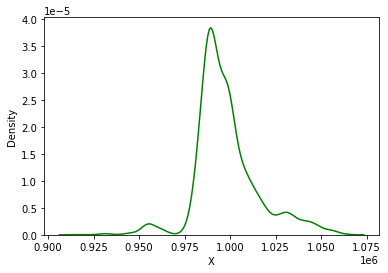

In [77]:
sns.distplot(data2["X"],hist=False,color="green",kde=True)

<AxesSubplot:xlabel='X'>

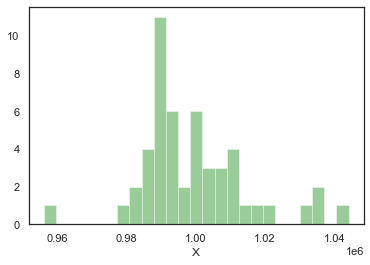

In [204]:
sns.distplot(data2["X"].head(50),hist=True,color="green",kde=False,bins=25)

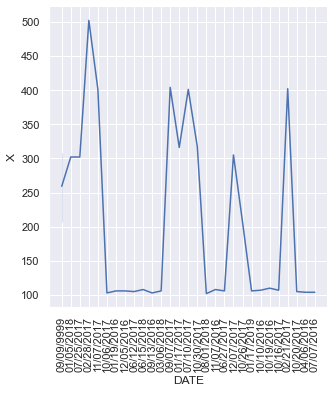

In [120]:
sns.relplot(x="DATE",y="X",kind="line",data=data.head(50))
plt.xticks(rotation=90)
plt.show()

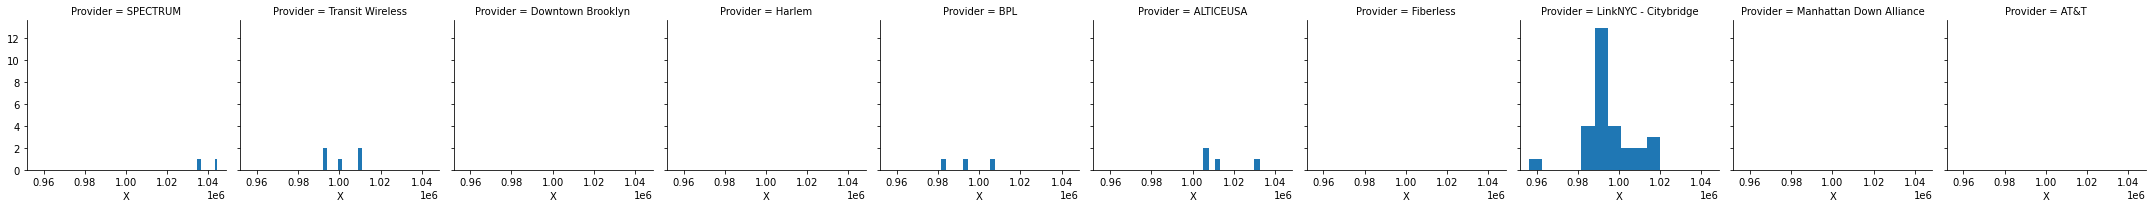

In [105]:
sns.FacetGrid(data2.head(50),col="Provider").map(plt.hist,"X")

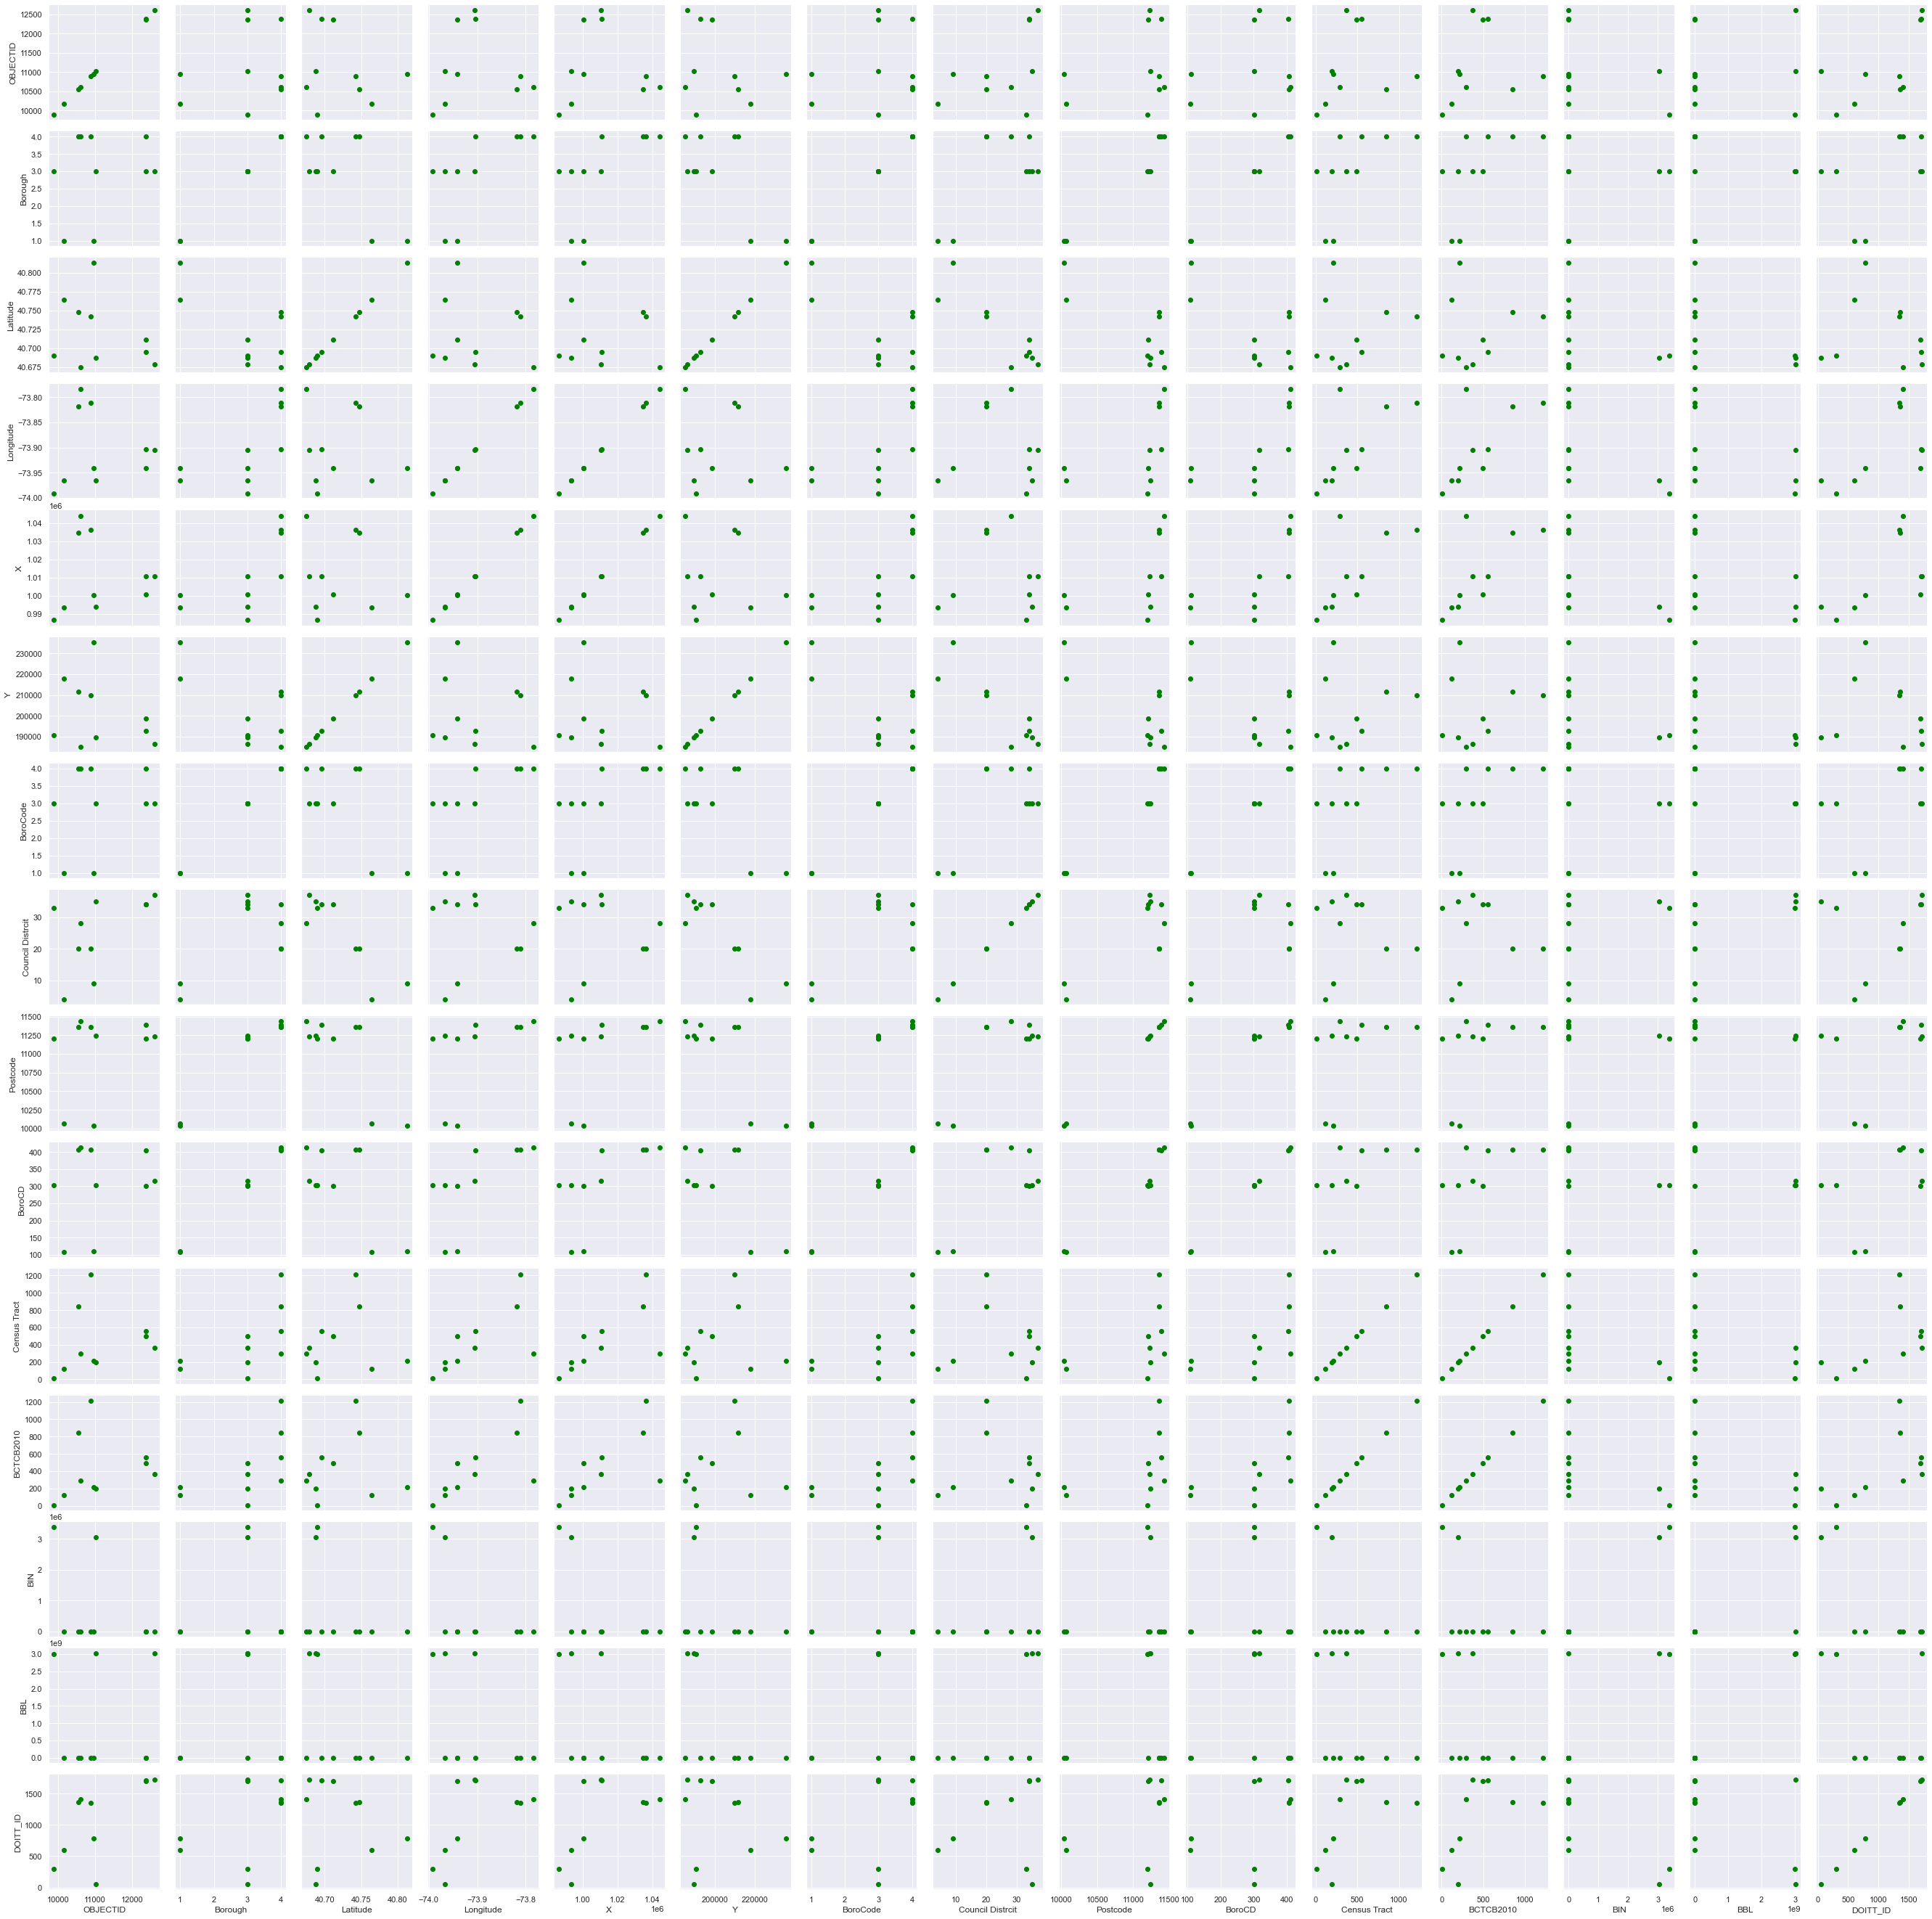

In [108]:
sns.set(style="darkgrid")
sns.PairGrid(data2.head(10)).map(plt.scatter,color="green")
plt.show()

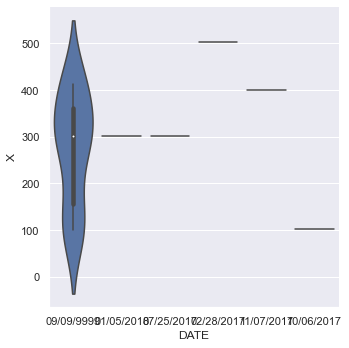

In [111]:
sns.catplot(x="DATE",y="X",kind="violin",data=data.head(20))

<AxesSubplot:xlabel='DATE', ylabel='X'>

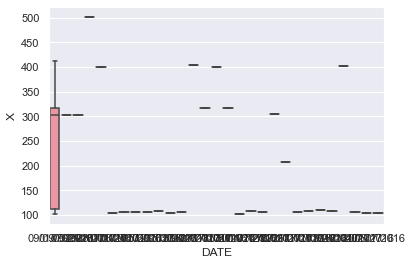

In [115]:
sns.boxplot(x="DATE",y="X",data=data.head(50))

In [116]:
sns.despine(offset=10,trim=True)

<Figure size 432x288 with 0 Axes>

C:\Users\hp 840\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

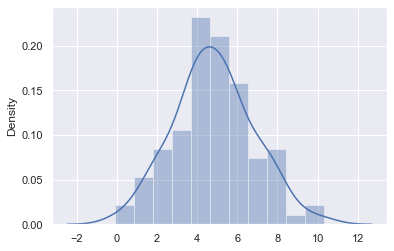

In [117]:
sns.distplot(np.random.normal(loc=5,size=100,scale=2))

C:\Users\hp 840\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


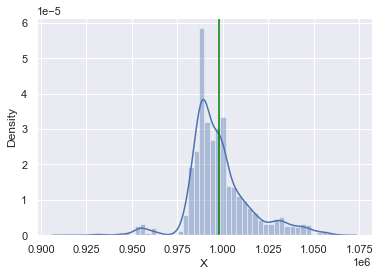

In [122]:
mean=data2["X"].mean()
sns.distplot(data2["X"])
plt.axvline(mean,0,1,color="green")

<AxesSubplot:xlabel='Provider', ylabel='X'>

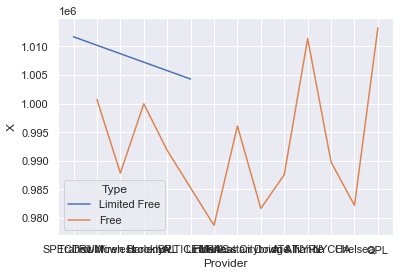

In [126]:
sns.lineplot(x="Provider",y="X",hue="Type",data=data2.head(200),ci=None)

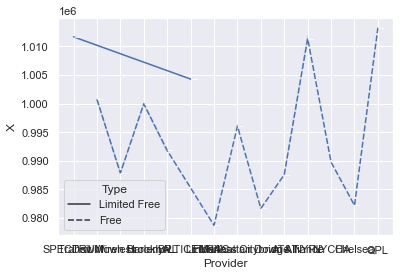

In [132]:
sns.lineplot(x="Provider",y="X",data=data2.head(200),ci=False,style="Type",marker=True)
plt.show()

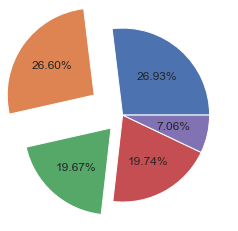

In [146]:
plt.pie(data.X.head(5),explode=(0.0,0.4,0.2,0.0,0.0),autopct="%0.2f%%",labeldistance=2.2)
plt.show()

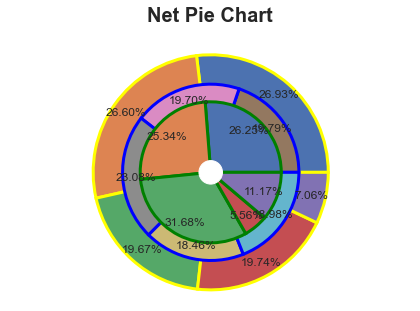

In [152]:
plt.pie(data.X.head(5),pctdistance=0.88,radius=1.0,autopct="%0.2f%%",wedgeprops={"linewidth":3,"edgecolor":"yellow"})
plt.pie(data.Y.head(5),pctdistance=0.85,radius=0.75,autopct="%0.2f%%",wedgeprops={"linewidth":3,"edgecolor":"blue"})
plt.pie(data.Z.head(5),pctdistance=0.8,radius=0.6,autopct="%0.2f%%",wedgeprops={"linewidth":3,"edgecolor":"green"})
centre_circle=plt.Circle((0,0),0.1,fc="white")
plt.gcf().gca().add_artist(centre_circle)
plt.tight_layout()
plt.axis("equal")

plt.title("Net Pie Chart",fontweight="bold",fontsize=20,pad=20)
plt.show()


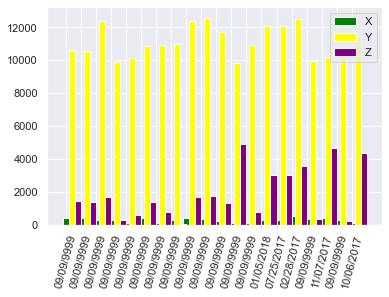

In [172]:
w=0.4
data=data.head(20)
bar1=np.arange(len(data.DATE))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]
               
plt.bar(bar1,data.X,w,label="X",color="green")
plt.bar(bar2,data.Y,w,label="Y",color="yellow")
plt.bar(bar3,data.Z,w,label="Z",color="purple")

plt.xticks(bar1,data.DATE,rotation=75)
plt.legend()
plt.show()


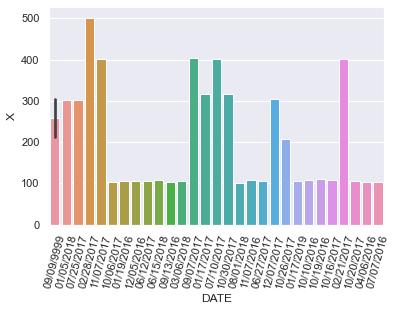

In [164]:
sns.barplot(x=data.DATE.head(50),y=data.X.head(50))
plt.xticks(rotation=75)
plt.show()

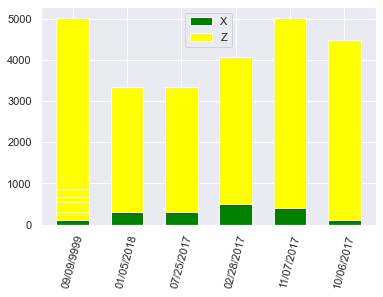

In [173]:
w=0.6
data=data.head(50)
plt.bar(data.DATE,data.X,w,label="X",color="green")
plt.bar(data.DATE,data.Z,w,bottom=data.X,color="yellow",label="Z")
plt.legend()
plt.xticks(rotation=75)
plt.show()

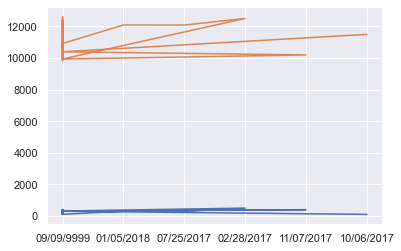

In [183]:
plt.plot(data.DATE.head(100),data.X.head(100))
plt.plot(data.DATE.head(100),data.Y.head(100))
plt.show()

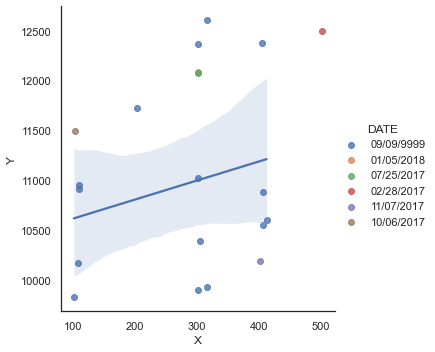

In [199]:
sns.lmplot(x="X",y="Y",data=data.head(100),fit_reg=True,hue="DATE") #linear regression

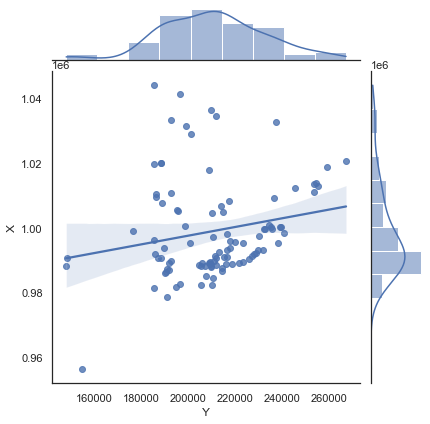

In [210]:
sns.jointplot(x="Y",y="X",data=data2.head(100),kind="reg") #kind can also be (kde,hex)

<Figure size 576x288 with 0 Axes>

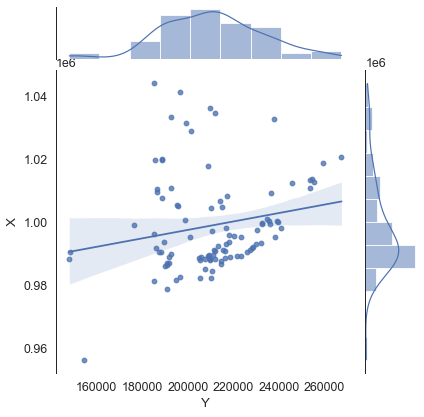

In [220]:
sns.set_style("white") #can also be (darkgrid,whitegrid,dark,ticks)
plt.figure(figsize=(8,4))

sns.set_context("paper",font_scale=1.4) #can also be (talk,poster)
sns.jointplot(x="Y",y="X",data=data2.head(100),kind="reg") 

sns.despine(left=False,bottom=True,top=True,Right=True) #STYLING

<AxesSubplot:xlabel='X', ylabel='Density'>

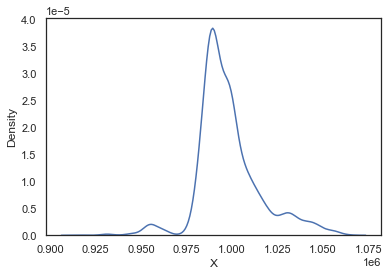

In [211]:
sns.kdeplot(data2["X"])

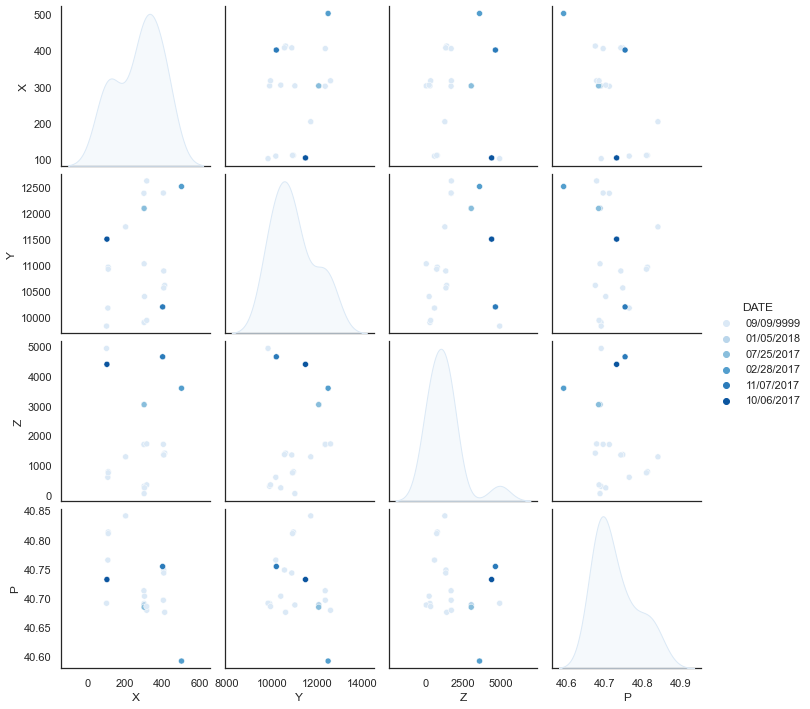

In [215]:
sns.pairplot(data.head(50),hue="DATE",palette="Blues")

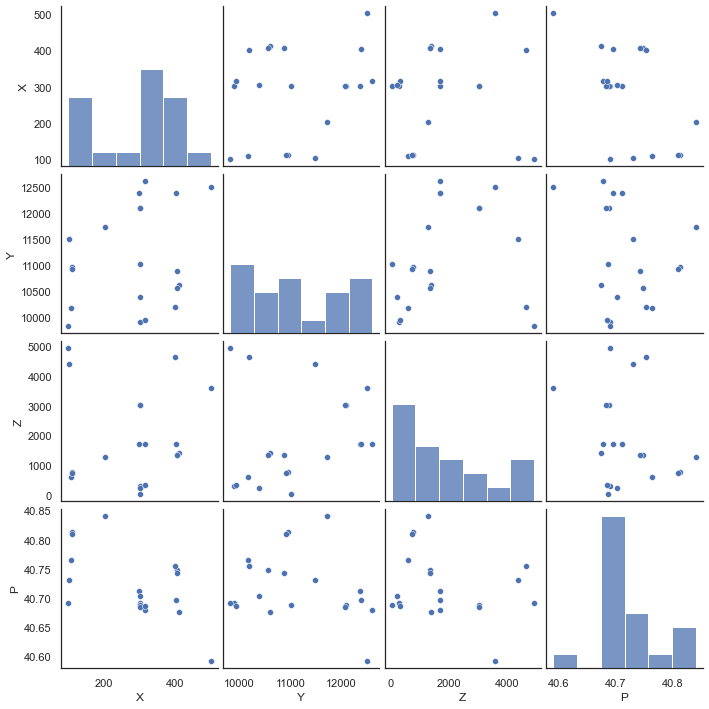

In [216]:
sns.pairplot(data.head(50))

<AxesSubplot:xlabel='Y'>

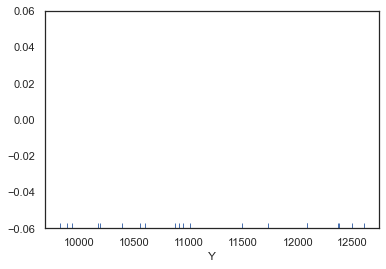

In [218]:
sns.rugplot(data["Y"])